[View in Colaboratory](https://colab.research.google.com/github/jotadram6/Colaboratory-HEP/blob/master/BasicAnalysis.ipynb)

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, a basic analysis example with pyROOT

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
dpkg-dev is already the newest version (1.19.0.5ubuntu2).
dpkg-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
tar is already the newest version (1.29b-2).
binutils is already the newest version (2.30-21ubuntu1~18.04).
binutils set to manually installed.
g++ is already the newest version (4:7.3.0-3ubuntu2.1).
g++ set to manually installed.
gcc is already the newest version (4:7.3.0-3ubuntu2.1).
gcc set to manually installed.
gfortran is already the newest version (4:7.3.0-3ubuntu2.1).
git is already the newest version (1:2.17.1-1ubuntu0.1).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.1).
libx11-dev set to manually installed.
The following additional packages will be installed:
  cmake-data libapr1 libaprutil1 libarchive13 libjsoncpp1 liblzo2-2 librhash0
  libserf-1-1 libsvn1 libuv1 libxpm4 x11proto-xext-dev
Suggested packages:
  cmake-doc nin

### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Team Drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  root_build_google_yikes.tar
BasicPyROOTExample.ipynb  TrimmedTree.root


In [0]:
!tar -xf /content/drive/Team\ Drives/PyROOT_in_Google/root_build_google_yikes.tar

In [5]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20 23:35 root_build
drwxr-xr-x  2 root root 4.0K Oct  2 19:06 sample_data
drwx------  3 root root 4.0K Oct  4 15:10 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

# Now let's analyze the data contained in TrimmedTree.root file

### Importing necessary libraries

In [0]:
import ROOT

### Reading tree in root file

In [13]:
DataChain=ROOT.TChain("TrimmedTree")
DataChain.Add("/content/drive/Team Drives/PyROOT_in_Google/TrimmedTree.root")

1

### Getting the number of events contained in the tree

In [14]:
NumberOfEventsToCheck=DataChain.GetEntries()
print("We are going to analyze ",NumberOfEventsToCheck, " events")

We are going to analyze  100000  events


### Loop over the events

In [0]:
DiMuM = ROOT.TH1F( 'DiMuM', 'Di-muon mass distribution', 200, 60, 120 )
for entry in DataChain:
  NumberOfMuons=entry.MuonPt.size()
  if NumberOfMuons!=2: continue # Accepting only events with exactly two muons
  muon1 = ROOT.TLorentzVector()
  muon2 = ROOT.TLorentzVector()
  muon1.SetPtEtaPhiM(entry.MuonPt.at(0),entry.MuonEta.at(0),entry.MuonPhi.at(0),0.106)
  muon2.SetPtEtaPhiM(entry.MuonPt.at(1),entry.MuonEta.at(1),entry.MuonPhi.at(1),0.106)
  DiMuonSystem = muon1 + muon2
  #print(DiMuonSystem.M())
  DiMuM.Fill(DiMuonSystem.M())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


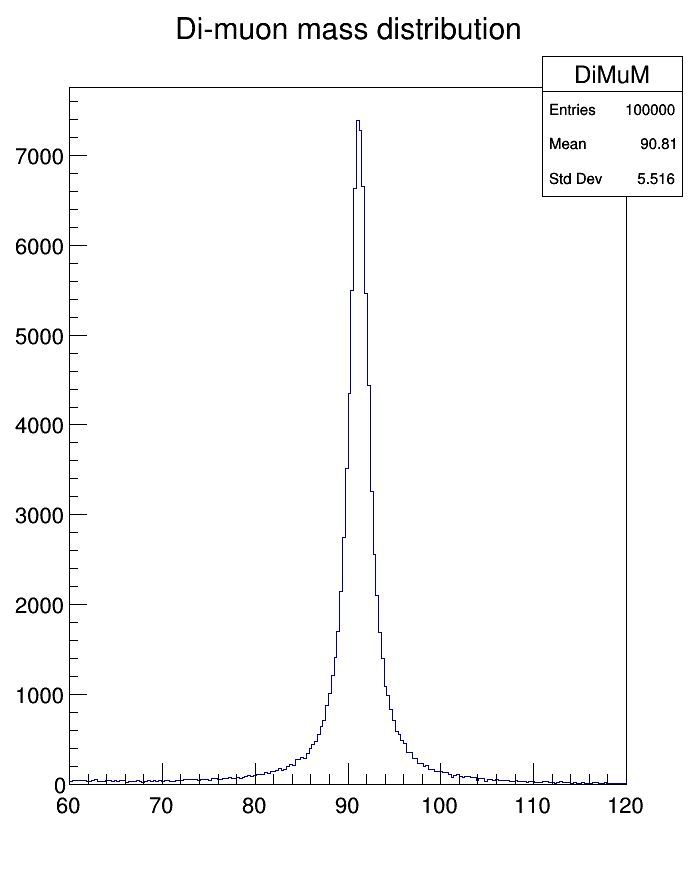

In [22]:
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
DiMuM.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()
